# Random Forest

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [4]:
model = RandomForestClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7619047619047619

* **n_estimators:** Kullanılacak olan ağaç sayısıdır.
* **max_features:** Maksimum değişken sayısıdır.
* **min_samples_split:** Dallanmayı kontrol etmektir.

In [5]:
params = {
    "n_estimators": [100,200,500,1000], 
    "max_features": [3, 5, 7, 8],
    "min_samples_split": [2, 5, 10, 20],
}
model = RandomForestClassifier()
model_cv = GridSearchCV(model, params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.3min finished


In [6]:
model_cv.best_params_

{'max_features': 5, 'min_samples_split': 2, 'n_estimators': 200}

In [10]:
model_tuned = RandomForestClassifier(max_features=5, min_samples_split=2, n_estimators=200).fit(X_train, y_train)
y_pred = model_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7619047619047619

## Değişken Önem Düzeyleri

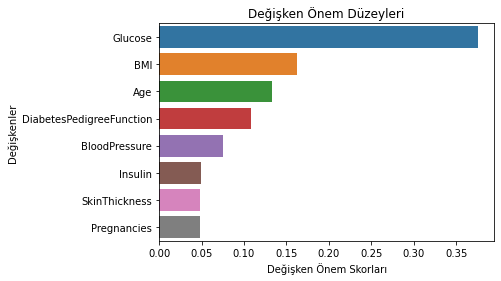

In [12]:
feature_imp = pd.Series(model_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Değişken Önem Düzeyleri")
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.show()